# Other matplotlib plots

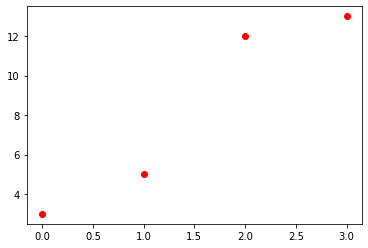

In [25]:
import matplotlib.pyplot as plt
plt.plot([3,5,12,13],'ro')

<BarContainer object of 3 artists>

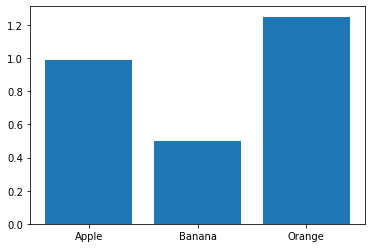

In [24]:
plt.bar(['Apple','Banana','Orange'],[0.99,0.50,1.25])

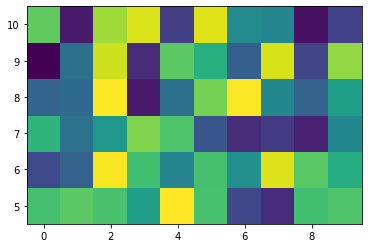

In [19]:
import numpy as np
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

plt.pcolormesh(x, y, Z)

([<matplotlib.patches.Wedge at 0x7fdc007a7190>,
 [Text(0.8899186877588753, 0.6465637858537406, 'Apple'),
  Text(-0.8899187180267095, 0.6465637441936395, 'Banana'),
  Text(1.0298943251329446e-07, -1.0999999999999954, 'Orange'),
  Text(1.0461622140716127, -0.33991855178672087, 'Pear')])

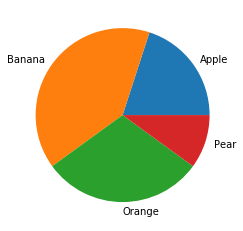

In [20]:
plt.pie([20,40,30,10], labels=['Apple','Banana','Orange','Pear'])

Text(0.5, 1.0, 'Kangaroo Jumps Today')

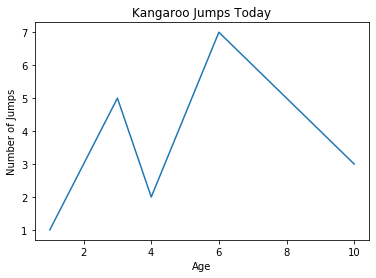

In [26]:
plt.plot([1,3,4,6,10],[1,5,2,7,3])
plt.xlabel('Age')
plt.ylabel('Number of Jumps')
plt.title('Kangaroo Jumps Today')

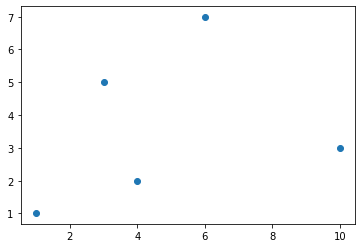

In [27]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])

Text(0.5, 1.0, 'Kangaroo Jumps Today')

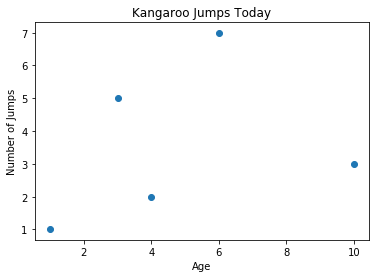

In [28]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])
ax.set_xlabel('Age')
ax.set_ylabel('Number of Jumps')
ax.set_title('Kangaroo Jumps Today')

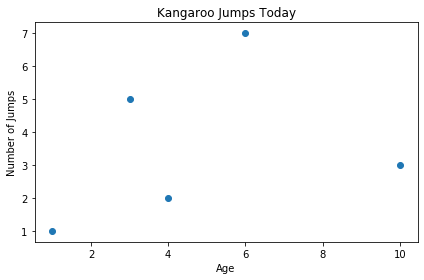

In [29]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])
ax.set_xlabel('Age')
ax.set_ylabel('Number of Jumps')
ax.set_title('Kangaroo Jumps Today')
fig.tight_layout()

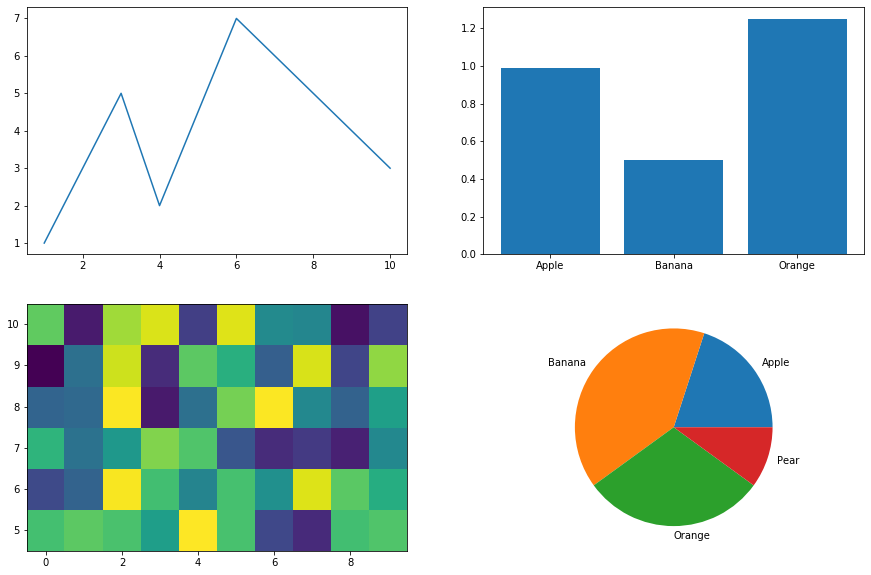

In [30]:
import numpy as np
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot([1,3,4,6,10],[1,5,2,7,3])
ax[0,1].bar(['Apple','Banana','Orange'],[0.99,0.50,1.25])
ax[1,0].pcolormesh(x, y, Z)
ax[1,1].pie([20,40,30,10], labels=['Apple','Banana','Orange','Pear'])
fig.savefig('vis.png')

# Plotting with pandas

In [31]:
import pandas as pd
fruit = pd.DataFrame({'name': ['Apple','Banana','Orange','Pear'],
         'count': [20,40,30,10],
         'price': [0.99,0.50,1.25,1.25]})

name  count  price
0   Apple     20   0.99
1  Banana     40   0.50
2  Orange     30   1.25
3    Pear     10   1.25

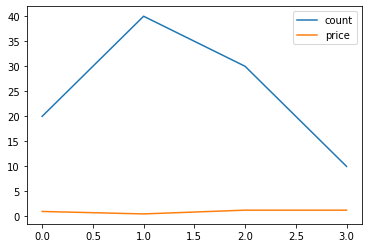

In [32]:
fruit.plot()

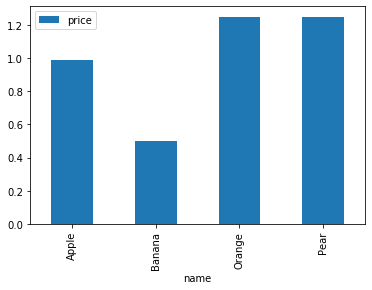

In [33]:
fruit.plot(kind='bar',x='name',y='price')

<BarContainer object of 4 artists>

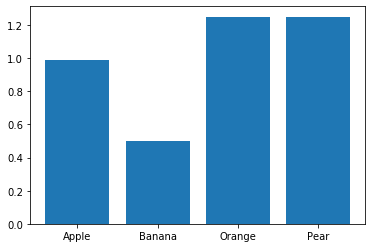

In [34]:
plt.bar(x='name',height='price',data=fruit)

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not ['Apple' 'Banana' 'Orange' 'Pear'].

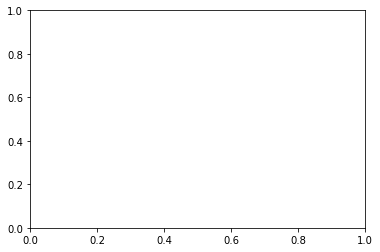

In [37]:
fruit.plot.scatter(x='price',y='count', c='name')

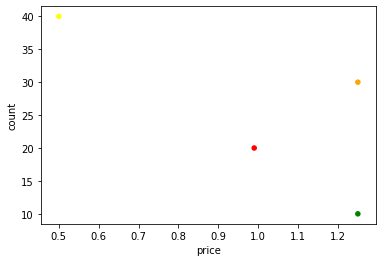

In [38]:
colors = {'Apple': 'red','Orange': 'orange','Banana': 'yellow','Pear': 'green'}
fruit.plot.scatter(x='price',y='count', c=fruit['name'].map(colors))

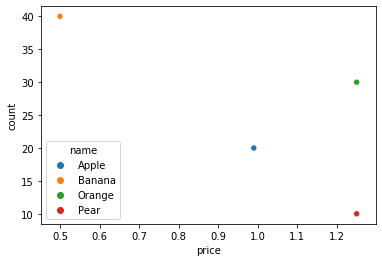

In [41]:
# may need to install seaborn
# %conda install -c conda-forge seaborn

import seaborn as sns
sns.scatterplot(x='price',y='count',hue='name', data=fruit)

# Altair

In [42]:
# may need to install altair
# %conda install -c conda-forge altair

import altair as alt
import pandas as pd

In [43]:
data = pd.DataFrame({
  'x': [1,3,4,6,10],
  'y': [1,5,2,7,3]
})

alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

alt.Chart(...)

### Attribute Types

In [44]:
data = pd.DataFrame({
    'age': [1,3,4,6,10],
    'weight': [20,50,25,55,125],
    'zoo_area': [1,3,3,1,2],
    'num_scoops': [3,2,4,2,3]
})

alt.Chart(data).mark_point(filled=True, size=50, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area'
)

alt.Chart(...)

In [45]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:O'
)

alt.Chart(...)

In [46]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N'
)

alt.Chart(...)

In [47]:
# Bubble Chart

data = pd.DataFrame({
    'age': [1,3,4,6,10, 11,7,5,9,9],
    'weight': [20,50,25,55,125, 20,50,25,55,125],
    'zoo_area': [1,3,3,1,2, 1,3,3,1,2],
    'num_scoops': [3,2,4,2,3,10,5,7,90,120]
})

alt.Chart(data).mark_point(filled=True, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N',
    size='num_scoops'
)

alt.Chart(...)

### Concatenation, Layering, and Repetition

In [48]:
c1 = alt.Chart(data).mark_point(filled=True, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N',
    size='num_scoops'
)

alt.Chart(...)

In [49]:
c2 = alt.Chart(data).mark_bar().encode(
    x='zoo_area:N',
    y='count()'
)

alt.Chart(...)

In [50]:
c1 | c2

alt.HConcatChart(...)

In [51]:
c1 & c2

alt.VConcatChart(...)

In [52]:
data = pd.DataFrame({
  'x': [1,3,4,6,10],
  'y': [1,5,2,7,3]
})

lines = alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

dots = alt.Chart(data).mark_point(size=150, shape='diamond', color='red',filled=True).encode(
    x='x',
    y='y'
)

lines

alt.Chart(...)

In [53]:
dots

alt.Chart(...)

In [54]:
lines + dots

alt.LayerChart(...)

In [55]:
penguins = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/penguins.json'

alt.Chart(penguins).mark_point().encode(
    alt.X("Beak Length (mm):Q", scale=alt.Scale(zero=False)),
    alt.Y("Beak Depth (mm):Q", scale=alt.Scale(zero=False)),
    color='Species:N'
)

alt.Chart(...)

In [57]:
penguins = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/penguins.json'

alt.Chart(penguins).mark_point().encode(
    alt.X(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero=False)),
    alt.Y(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    color='Species:N'
).properties(
    width=200,
    height=200
).repeat(
    row=['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)'],
    column=['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)']
).interactive()

alt.RepeatChart(...)